In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,InputLayer,Dropout
from keras.layers import LSTM
from config.config import *
from config.constants import *
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
import os
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
import regex as re

In [5]:
master_binary = []
master_bin_with_multi = []

In [7]:
# current directory
th_path = "./TrainingSet/"

# list of file of the given path is assigned to the variable 
th_file_list = [th_path+each for each in list(os.walk(th_path))[0][-1] if ".csv" in each]

clus_path = './KMTrainingset/'

clus_file_list = [clus_path+each for each in list(os.walk(clus_path))[0][-1] if ".csv" in each]

In [8]:
range_path = './RangeTrainingset/'
range_file_list = [range_path+each for each in list(os.walk(range_path))[0][-1] if ".csv" in each]

In [9]:
bin_th_model = load_model('manual_binary_clf.pkl')
mul_th_model = load_model('manual_multi_clf.pkl')

In [10]:
bin_clus_model = load_model('clus_binary_clf.pkl')
mul_clus_model = load_model('clus_multi_clf.pkl')

In [11]:
bin_range_model = load_model('range_binary_clf.pkl')
mul_range_model = load_model('range_multi_clf.pkl')

In [12]:
bin_new_model = load_model('range_lSim_binary_clf.pkl/')
mul_new_model = load_model('range_lSim_multi_clf.pkl/')

# 1. Testing threshold model 

### Trainingset + TH Binary model

In [13]:
matrix = {}
for i in range(len(th_file_list)):

    fault_type = re.sub(r'[0-9]+', '', th_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(th_file_list[i])

    original_labels = data['label']
    #print(fault_type, set(original_labels))

    original_labels = [1 if each!=0 else 0 for each in original_labels ]
    data =data.drop('label',axis=1)
    predicted_labels = np.argmax(bin_th_model.predict(data.values.reshape(-1,1,6)), axis=1)
    
    percentage = 100*[x-y for x,y in zip(original_labels,predicted_labels)].count(0)/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

In [14]:
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

print(matrix)

{'ABCG': 90.755, 'ABG': 95.77850000000001, 'BC': 97.17750000000001, 'CG': 98.543, 'BCG': 95.69, 'BG': 98.49599999999998, 'AG': 97.91500000000002, 'ABC': 89.962, 'ACG': 95.319, 'AC': 94.12750000000001, 'AB': 94.48400000000001}


In [15]:
master_binary.append(matrix)

In [16]:
sum(matrix.values())/len(matrix.values())

95.29522727272727

## KMTrainingset + TH Binary model

In [17]:
matrix = {}
for i in range(len(clus_file_list)):

    fault_type = re.sub(r'[0-9]+', '', clus_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(clus_file_list[i])

    original_labels = data['label']
    #print(fault_type, set(original_labels))

    original_labels = [1 if each!=0 else 0 for each in original_labels ]
    data =data.drop('label',axis=1)
    predicted_labels = np.argmax(bin_th_model.predict(data.values.reshape(-1,1,6)), axis=1)
    
    percentage = 100*[x-y for x,y in zip(original_labels,predicted_labels)].count(0)/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

In [18]:
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

print(matrix)

{'ABCG': 74.454, 'ABG': 88.93350000000001, 'BC': 95.111, 'CG': 87.39799999999998, 'BCG': 80.32, 'BG': 96.1805, 'AG': 96.561, 'ABC': 82.6125, 'ACG': 88.69500000000001, 'AC': 93.18999999999998, 'AB': 93.444}


In [19]:
master_binary.append(matrix)

In [20]:
sum(matrix.values())/len(matrix.values())

88.80904545454544

## Trainingset + Clus Binary model

In [21]:
matrix = {}
for i in range(len(th_file_list)):

    fault_type = re.sub(r'[0-9]+', '', th_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(th_file_list[i])

    original_labels = data['label']
    #print(fault_type, set(original_labels))

    original_labels = [1 if each!=0 else 0 for each in original_labels ]
    data =data.drop('label',axis=1)
    predicted_labels = np.argmax(bin_clus_model.predict(data.values.reshape(-1,1,6)), axis=1)
    
    percentage = 100*[x-y for x,y in zip(original_labels,predicted_labels)].count(0)/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

In [22]:
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

print(matrix)

{'ABCG': 74.254, 'ABG': 88.7625, 'BC': 94.04499999999999, 'CG': 91.95200000000001, 'BCG': 82.47149999999999, 'BG': 96.066, 'AG': 96.457, 'ABC': 67.553, 'ACG': 86.9515, 'AC': 88.53000000000002, 'AB': 90.01199999999999}


In [23]:
master_binary.append(matrix)

In [24]:
sum(matrix.values())/len(matrix.values())

87.00495454545454

## KMTrainingset + Clus Binary model

In [25]:
matrix = {}
for i in range(len(clus_file_list)):

    fault_type = re.sub(r'[0-9]+', '', clus_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(clus_file_list[i])

    original_labels = data['label']
    #print(fault_type, set(original_labels))

    original_labels = [1 if each!=0 else 0 for each in original_labels ]
    data =data.drop('label',axis=1)
    predicted_labels = np.argmax(bin_clus_model.predict(data.values.reshape(-1,1,6)), axis=1)
    
    percentage = 100*[x-y for x,y in zip(original_labels,predicted_labels)].count(0)/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

In [26]:
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

print(matrix)

{'ABCG': 90.23700000000001, 'ABG': 99.956, 'BC': 99.94050000000001, 'CG': 91.246, 'BCG': 91.69800000000001, 'BG': 99.95400000000001, 'AG': 99.94450000000002, 'ABC': 99.819, 'ACG': 99.9375, 'AC': 99.92049999999999, 'AB': 99.911}


In [27]:
master_binary.append(matrix)

In [28]:
sum(matrix.values())/len(matrix.values())

97.50581818181819

In [29]:
x = pd.DataFrame(master_binary)
x.index = ['TH+TH','TH+CLS','CLS+TH','CLS+CLS']
x['Avg'] = [round(sum(x.iloc[i])/x.shape[1]) for i in range(x.shape[0])]

In [30]:
#x

In [31]:
x.to_csv('Binary_Matrix.csv')

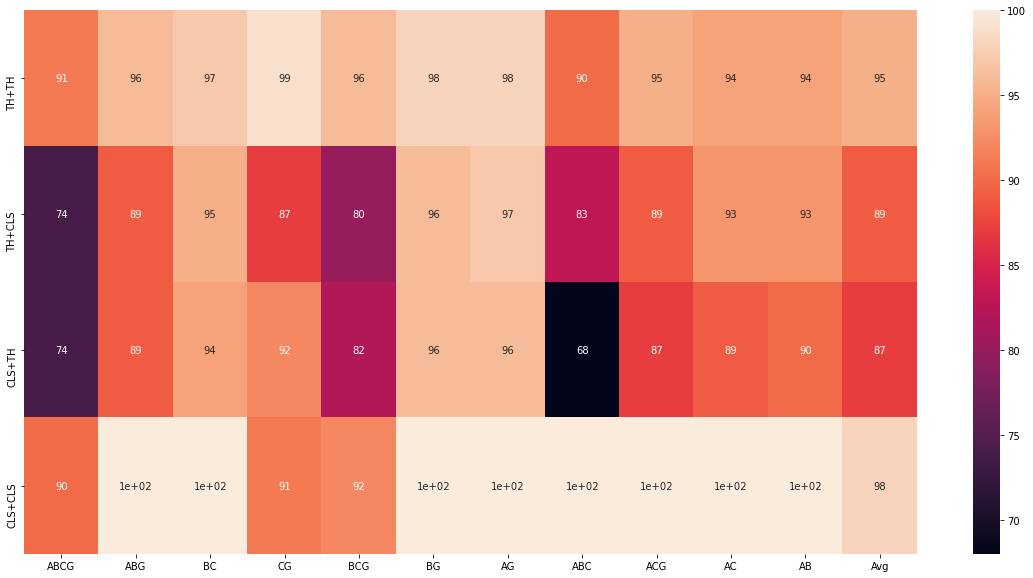

In [32]:
plt.figure(figsize=(20,10))


ax = sns.heatmap(round(x), linewidth=0,annot=True)
plt.savefig('binary_validation.png')
plt.show()

## Binary + Multi

### 1. Binary = TH

In [33]:
all_faluts = ['NML','AB', 'AC', 'BC', 'ABC', 'AG', 'BG', 'ABG', 'CG', 'ACG', 'BCG', 'ABCG']

In [34]:
master_bin_with_multi = []

### Trainingset

In [39]:
matrix = {}
for i in range(len(th_file_list)):

    fault_type = re.sub(r'[0-9]+', '', th_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(th_file_list[i])


    original_labels = data['label']
    data = data[data.columns[:3]]
    index = list(set(original_labels))[-1]

    #data =data.drop('label',axis=1)

    predicted_labels = np.argmax(bin_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

    data['label'] = predicted_labels

    data = data[data.label!=0]

    data = data.drop('label',axis=1)

    predicted_labels = np.argmax(mul_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

    results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

    major_label = results[-1][0]


    percentage = list(predicted_labels).count(index-1)*100/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_bin_with_multi.append(matrix)

In [41]:
matrix = {}
for i in range(len(th_file_list)):

    fault_type = re.sub(r'[0-9]+', '', th_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(th_file_list[i])

    original_labels = data['label']

    index = list(set(original_labels))[-1]

    data = data[data.columns[:3]]
    #data =data.drop('label',axis=1)

    predicted_labels = np.argmax(bin_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

    data['label'] = predicted_labels

    data = data[data.label!=0]

    data = data.drop('label',axis=1)

    predicted_labels = np.argmax(mul_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

    results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

    major_label = results[-1][0]


    percentage = list(predicted_labels).count(index-1)*100/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_bin_with_multi.append(matrix)

In [ ]:
matrix = {}
for i in range(len(th_file_list)):

    fault_type = re.sub(r'[0-9]+', '', th_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(th_file_list[i])

    original_labels = data['label']

    index = list(set(original_labels))[-1]
    data = data[data.columns[:3]]
    #data =data.drop('label',axis=1)

    predicted_labels = np.argmax(bin_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

    data['label'] = predicted_labels

    data = data[data.label!=0]

    #data = data.drop('label',axis=1)

    predicted_labels = np.argmax(mul_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

    results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

    major_label = results[-1][0]


    percentage = list(predicted_labels).count(index-1)*100/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_bin_with_multi.append(matrix)

In [ ]:
matrix = {}
for i in range(len(th_file_list)):

    fault_type = re.sub(r'[0-9]+', '', th_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(th_file_list[i])

    original_labels = data['label']

    index = list(set(original_labels))[-1]

    data = data[data.columns[:3]]
    #data =data.drop('label',axis=1)

    predicted_labels = np.argmax(bin_clus_model.predict(data.values.reshape(-1,1,3)), axis=1)

    data['label'] = predicted_labels

    data = data[data.label!=0]

    data = data.drop('label',axis=1)

    predicted_labels = np.argmax(mul_clus_model.predict(data.values.reshape(-1,1,3)), axis=1)

    results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

    major_label = results[-1][0]


    percentage = list(predicted_labels).count(index-1)*100/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_bin_with_multi.append(matrix)

In [ ]:
y = pd.DataFrame(master_bin_with_multi)
y.index = ['TH+TH','TH+CLS','CLS+TH','CLS+CLS']

In [ ]:
#y

In [ ]:
plt.figure(figsize=(20,10))


ax = sns.heatmap(round(y), linewidth=0,annot=True)
plt.savefig("training_binary_multi.png")
plt.show()

In [ ]:
y.to_csv('training_bin_mul.csv')

### KMTraininngset

In [ ]:
matrix = {}
for i in range(len(clus_file_list)):

    fault_type = re.sub(r'[0-9]+', '', clus_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(clus_file_list[i])

    original_labels = data['label']

    index = list(set(original_labels))[-1]

    data =data.drop('label',axis=1)

    predicted_labels = np.argmax(bin_th_model.predict(data.values.reshape(-1,1,6)), axis=1)

    data['label'] = predicted_labels

    data = data[data.label!=0]

    data = data.drop('label',axis=1)

    predicted_labels = np.argmax(mul_th_model.predict(data.values.reshape(-1,1,6)), axis=1)

    results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

    major_label = results[-1][0]


    percentage = list(predicted_labels).count(index-1)*100/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_bin_with_multi.append(matrix)

In [ ]:
matrix = {}
for i in range(len(clus_file_list)):

    fault_type = re.sub(r'[0-9]+', '', clus_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(clus_file_list[i])

    original_labels = data['label']

    index = list(set(original_labels))[-1]

    data =data.drop('label',axis=1)

    predicted_labels = np.argmax(bin_th_model.predict(data.values.reshape(-1,1,6)), axis=1)

    data['label'] = predicted_labels

    data = data[data.label!=0]

    data = data.drop('label',axis=1)

    predicted_labels = np.argmax(mul_clus_model.predict(data.values.reshape(-1,1,6)), axis=1)

    results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

    major_label = results[-1][0]


    percentage = list(predicted_labels).count(index-1)*100/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_bin_with_multi.append(matrix)

In [ ]:
matrix = {}
for i in range(len(clus_file_list)):

    fault_type = re.sub(r'[0-9]+', '', clus_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(clus_file_list[i])

    original_labels = data['label']

    index = list(set(original_labels))[-1]

    data =data.drop('label',axis=1)

    predicted_labels = np.argmax(bin_clus_model.predict(data.values.reshape(-1,1,6)), axis=1)

    data['label'] = predicted_labels

    data = data[data.label!=0]

    data = data.drop('label',axis=1)

    predicted_labels = np.argmax(mul_th_model.predict(data.values.reshape(-1,1,6)), axis=1)

    results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

    major_label = results[-1][0]


    percentage = list(predicted_labels).count(index-1)*100/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_bin_with_multi.append(matrix)

In [ ]:
matrix = {}
for i in range(len(clus_file_list)):

    fault_type = re.sub(r'[0-9]+', '', clus_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(clus_file_list[i])

    original_labels = data['label']

    index = list(set(original_labels))[-1]

    data =data.drop('label',axis=1)

    predicted_labels = np.argmax(bin_clus_model.predict(data.values.reshape(-1,1,6)), axis=1)

    data['label'] = predicted_labels

    data = data[data.label!=0]

    data = data.drop('label',axis=1)

    predicted_labels = np.argmax(mul_clus_model.predict(data.values.reshape(-1,1,6)), axis=1)

    results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

    major_label = results[-1][0]


    percentage = list(predicted_labels).count(index-1)*100/data.shape[0]
    
    if fault_type not in list(matrix.keys()):
        matrix[fault_type] = []
        matrix[fault_type].append(percentage)
    else:
        matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_bin_with_multi.append(matrix)

In [ ]:
z = pd.DataFrame(master_bin_with_multi[4:])
z.index = ['TH+TH','TH+CLS','CLS+TH','CLS+CLS']

In [ ]:
#z

In [ ]:
z.to_csv('kmtraining_binary_mul.csv')

In [ ]:

#plt.plot(z.T)
plt.figure(figsize=(20,10))

ax = sns.heatmap(round(z), linewidth=0,annot=True)
plt.savefig("kmtraining_binary_multi.png")
plt.show()

## Range training-set

In [42]:
master_tester = []

In [43]:
matrix = {}
for i in range(len(range_file_list)):

    fault_type = re.sub(r'[0-9]+', '', range_file_list[i].split("/")[-1].split(".")[0])
    data = pd.read_csv(range_file_list[i])

    original_labels = data['label']

    index = list(set(original_labels))[-1]

    if index !=0:
        

        data =data.drop('label',axis=1)

        predicted_labels = np.argmax(bin_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

        data['label'] = predicted_labels

        data = data[data.label!=0]
        #print(range_file_list[i],set(original_labels),index)

        data = data.drop('label',axis=1)



        predicted_labels = np.argmax(mul_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

        results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

        major_label = results[-1][0]


        percentage = list(predicted_labels).count(index-1)*100/data.shape[0]

        if fault_type not in list(matrix.keys()):
            matrix[fault_type] = []
            matrix[fault_type].append(percentage)
        else:
            matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_tester.append(matrix)

KeyboardInterrupt: 

In [ ]:
matrix = {}
for i in range(len(th_file_list)):

    fault_type = re.sub(r'[0-9]+', '', th_file_list[i].split("/")[-1].split(".")[0])
    if fault_type!='ABC':
        data = pd.read_csv(th_file_list[i])

        original_labels = data['label']

        data.drop(data.columns[3:6],axis=1,inplace=True)
        index = list(set(original_labels))[-1]
        if index>=4:
            original_labels-=2
            index-=1

        if index !=0:


            data =data.drop('label',axis=1)

            predicted_labels = np.argmax(bin_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

            data['label'] = predicted_labels

            data = data[data.label!=0]
            #print(range_file_list[i],set(original_labels),index)

            data = data.drop('label',axis=1)


            if data.shape[0]!=0:
                predicted_labels = np.argmax(mul_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

                results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

                major_label = results[-1][0]


                percentage = list(predicted_labels).count(index-1)*100/data.shape[0]

                if fault_type not in list(matrix.keys()):
                    matrix[fault_type] = []
                    matrix[fault_type].append(percentage)
                else:
                    matrix[fault_type].append(percentage)

        
for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_tester.append(matrix)

In [ ]:
matrix = {}
for i in range(len(clus_file_list)):

    fault_type = re.sub(r'[0-9]+', '', clus_file_list[i].split("/")[-1].split(".")[0])
    if fault_type!='ABC':
        data = pd.read_csv(clus_file_list[i])

        original_labels = data['label']

        data.drop(data.columns[3:6],axis=1,inplace=True)
        index = list(set(original_labels))[-1]
        
        if index>=4:
            original_labels-=2
            index-=1

        if index !=0:


            data =data.drop('label',axis=1)

            predicted_labels = np.argmax(bin_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

            data['label'] = predicted_labels

            data = data[data.label!=0]
            #print(range_file_list[i],set(original_labels),index)

            data = data.drop('label',axis=1)


            if data.shape[0]!=0:
                predicted_labels = np.argmax(mul_new_model.predict(data.values.reshape(-1,1,3)), axis=1)

                results = sorted(zip([each for each in Counter(predicted_labels).keys()],Counter(predicted_labels).values() ), key=lambda x: x[1])

                major_label = results[-1][0]


                percentage = list(predicted_labels).count(index-1)*100/data.shape[0]

                if fault_type not in list(matrix.keys()):
                    matrix[fault_type] = []
                    matrix[fault_type].append(percentage)
                else:
                    matrix[fault_type].append(percentage)


for each in matrix.keys():
    
    matrix[each] = sum(matrix[each])/len(matrix[each])

matrix['avg'] = sum(matrix.values())/len(matrix.values())
master_tester.append(matrix)

In [ ]:
rang = pd.DataFrame(master_tester)

In [ ]:
rang.index = ['RangeDataset','ThresholdDataset','ClusterDataset']

In [ ]:
rang.to_csv('lSimRange_bin_mul.csv')

In [ ]:
plt.figure(figsize=(20,6))

ax = sns.heatmap(round(rang), linewidth=0,annot=True)
plt.savefig("lSimNewtraining_binary_multi.png")
plt.show()